In [55]:
import pandas as  pd
from matplotlib import pyplot as plt
import numpy as np

In [56]:
#inlezen data voetbal excel
data = pd.read_excel('voetbal.xlsx')


In [57]:
#2. willekeurige geboortedatums genereren
data['geboortedatum'] = np.random.randint(1, 5, data.shape[0])


In [58]:
#3. genereren kolom inzet
def calculate_inzet(row):
    if row['geboortedatum'] == 1:
        return 'zeer goed'
    elif row['geboortedatum'] == 2 or row['geboortedatum'] == 3:
        return 'goed'
    elif row['geboortedatum'] == 4:
        return 'matig'
data['inzet'] = data.apply(calculate_inzet, axis=1)    


In [59]:
#printen van data
data

,naam,naam.1,positie,aantal gemaakte goalen,geboortedatum,inzet,gewicht,lengte
0,speler1,speler1,staart,1,4,matig,25.3,123
1,speler2,speler2,staart,0,4,matig,29.2,134
2,speler3,speler3,linkervleugel,1,2,goed,22.8,116
3,speler4,speler4,rechtervleugel,0,2,goed,23.2,121
4,speler5,speler5,piloot,6,3,goed,24.5,121
5,speler6,speler6,rechtervleugel,3,4,matig,23.0,124
6,speler7,speler7,keeper,0,4,matig,21.9,118
7,speler8,speler8,keeper,0,4,matig,22.6,120
8,speler9,speler9,keeper,0,4,matig,21.3,117
9,speler10,speler10,linkervleugel,0,1,zeer goed,22.2,116


(110, 140)

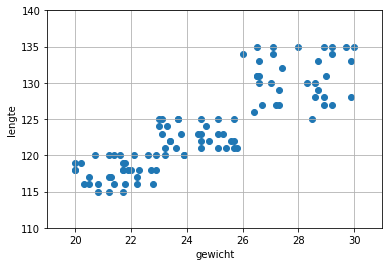

In [60]:
#4. grafiek op tabblad met naam grafiek
plt.scatter(data.gewicht, data.lengte)
plt.grid()
plt.xlabel('gewicht')
plt.ylabel('lengte')
plt.xlim(19, 31)
plt.ylim(110, 140)


In [61]:
#aamtal goalen per positie
#helpt bij het zoeken naar verband voor punt 8 (verband tussen positie op veld en aantal goalen)
data.groupby('positie')['aantal gemaakte goalen'].sum()

positie
keeper             0
linkervleugel     32
piloot            80
rechtervleugel    32
staart            16
Name: aantal gemaakte goalen, dtype: int64

Text(0, 0.5, 'Aantal goals')

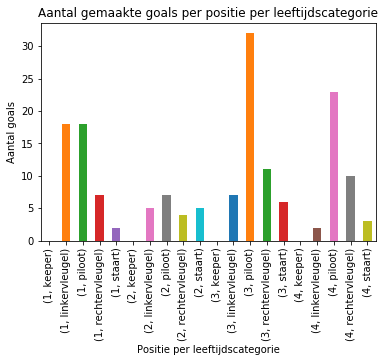

In [62]:
#5. Bar chart aantal gemaakte goalen per positie
bar = data.groupby(['geboortedatum','positie'])['aantal gemaakte goalen'].sum().plot.bar()
bar.set_title('Aantal gemaakte goals per positie per leeftijdscategorie')
bar.set_xlabel('Positie per leeftijdscategorie')
bar.set_ylabel('Aantal goals')

In [63]:
#6. modus aantal gemaakte goalen per positie
data.groupby('positie')['aantal gemaakte goalen'].apply(lambda x : x.mode())


positie          
keeper          0    0
linkervleugel   0    1
piloot          0    4
rechtervleugel  0    1
staart          0    0
Name: aantal gemaakte goalen, dtype: int64

In [64]:
#6. gemiddelde aantal gemaakte goalen per positie
data.groupby('positie')['aantal gemaakte goalen'].mean()


positie
keeper            0.0
linkervleugel     1.6
piloot            4.0
rechtervleugel    1.6
staart            0.8
Name: aantal gemaakte goalen, dtype: float64

In [65]:
#7 Bereken mbv Python kwartiel 1 van kolom G (het gewicht)
data['gewicht'].sort_values().quantile([0.25])

0.25    22.075
Name: gewicht, dtype: float64

In [66]:
#7 De standaardafwijking van kolom G (het gewicht)
np.std(data['gewicht'])

2.86912111978564

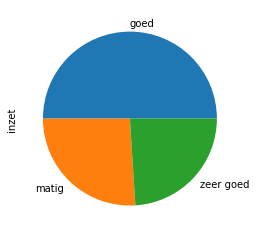

In [67]:
#9 cirkeldiagram per inzet
data['inzet'].value_counts().plot.pie()


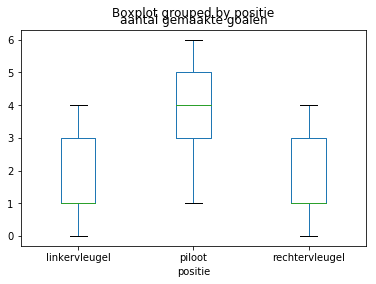

In [26]:
#10 Vergelijk de posities linkervleugel - rechtervleugel - piloot wat betreft het aantal gemaakte goalen mbv een boxplot en bespreek
data[data['positie'].isin(['linkervleugel','piloot','rechtervleugel'])].boxplot(by='positie',column =['aantal gemaakte goalen'], grid = False)